#model for real estate price prediction  

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing['CHAS'].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [7]:
#%matplotlib inline
#import matplotlib.pyplot as plt

In [8]:
#housing.hist(bins=50, figsize=(20,15))
#plt.show()

In [19]:
## train test splitting for learning purpose
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[test_set_size]
    train_indices = shuffled[test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)

[124  84 433 255  68 173 284 400 153 155 148 472  70 460 399  78 342  55
  73 176 274 414  30 423 323   9 452  93 181 505 167 386 265 453  63 154
 496 281  77 485 172 117 227 426 476 341 132 409   2 340 410 180 375  79
 490 450 249 509 104 498 218 286  33 365 479  72   0  11 302  22 101  82
 131  76 502 311  18 465 137 253 415  39 461  46 280 425 405  90 317 316
 238 298 475  69 247 299 370 506 494 483 275 454 324 208 204 301 390 416
 248 140 331 272 441 354  86 185  75 448  15 355 351 394  19 329 442  56
 245 501 447 338 432 210  25 488  42 244 310 336 126 333  31 113 397 486
 250  57 203  24  17 418  66 220 307  94 481 209  23 234 266 211   5 116
  45 182  16 473 364   3 320 194  60 110 325 268  29 195 262  26   7 469
 108  37 157 477 118 114 175 271 192 144 377 388 228 462 229 455 141 373
  67 222 168 504 384 322 193  81 109 446 145  92 152 231 334  83 103 165
 163 199 508  74 449 225 480 119 287 305 381 361 408 237 261 277 391 403
  36 196 139 495 360 290 291  59 111  89 417   6 36

In [ ]:
#print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set: 408
 Rows in test set: 103



In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000
mean,3.620674,13.320388,10.263107,0.067961,0.541116,6.360291,66.425243,3.964499,8.766990,392.436893,18.499029,368.482427,12.715728,23.82233
std,10.350426,27.400162,6.746703,0.252910,0.111724,0.702464,27.414494,2.148938,8.580877,166.598535,2.423759,68.391109,9.763726,9.90096
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.00000
25%,0.061400,0.000000,4.905000,0.000000,0.447500,5.942500,44.250000,2.169000,3.500000,270.000000,16.850000,376.635000,7.325000,19.30000
50%,0.217190,0.000000,8.140000,0.000000,0.515000,6.216000,71.600000,3.495200,5.000000,315.000000,19.200000,393.550000,10.110000,21.90000
75%,1.974730,0.000000,18.100000,0.000000,0.611500,6.672500,91.450000,5.570050,8.000000,453.000000,20.200000,396.900000,15.815000,27.50000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,23.000000,396.900000,76.000000,67.00000


In [25]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 212 to 49
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     103 non-null    float64
 1   ZN       103 non-null    float64
 2   INDUS    103 non-null    float64
 3   CHAS     103 non-null    int64  
 4   NOX      103 non-null    float64
 5   RM       103 non-null    float64
 6   AGE      103 non-null    float64
 7   DIS      103 non-null    float64
 8   RAD      103 non-null    int64  
 9   TAX      103 non-null    int64  
 10  PTRATIO  103 non-null    float64
 11  B        103 non-null    float64
 12  LSTAT    103 non-null    float64
 13  MEDV     103 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.1 KB


In [26]:
strat_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [27]:
strat_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

#Looking for Coorelations 

In [30]:
corr_matrix = housing.corr()

In [32]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.667695
ZN         0.339767
B          0.317941
DIS        0.233469
CHAS       0.164782
AGE       -0.368203
RAD       -0.379016
CRIM      -0.380072
NOX       -0.411486
PTRATIO   -0.447464
TAX       -0.459274
INDUS     -0.463269
LSTAT     -0.562960
Name: MEDV, dtype: float64

In [ ]:
#RM---> average number of rooms per dwelling
#ZN---> proportion of residential land zoned for lots over 25,000 sq ft
#B---> 1000(bk - 0.63)^2 where Bk is the proportion of blacks by towns

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

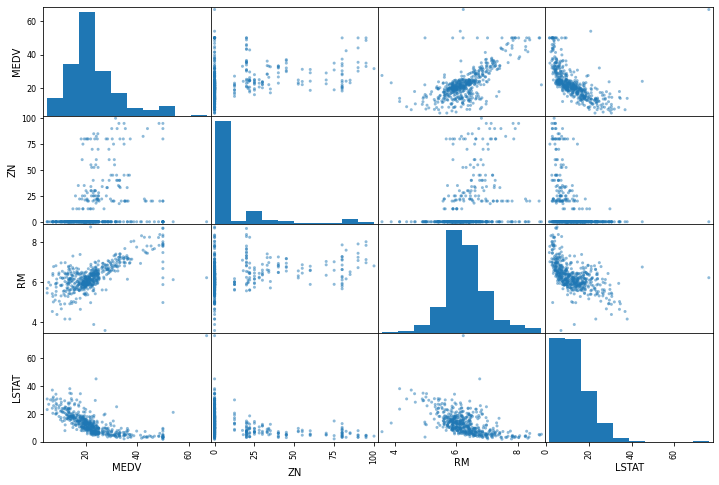

In [37]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "ZN", "RM", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

In [ ]:
housing.plot